In [1]:
import os
os.chdir('./data')
os.getcwd()

'/Users/yeonsik/Desktop/QuantModeling/Factor Model/data'

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("samsung_five_factor_momentum.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date']>'2016-01-01']
#액면분할을 고려한 adj_close값은 엑셀시트에서 직접 고쳐주었다.
df['Return'] = np.log(df['adj_close']).diff()
df.dropna(inplace=True)
df.set_index('Date', inplace=True)
df.head()

,adj_close,Mkt,SMB,HML,RMW,CMA,MOM,Rf,Return
Date,,,,,,,,,
2016-01-05,24160.0,0.006041,0.001565,0.001137,0.001877,0.002196,0.000687,0.000059,0.002487
2016-01-06,23500.0,-0.002659,0.002739,-0.003779,0.010858,0.003774,0.003234,0.000059,-0.027698
2016-01-07,23260.0,-0.011059,0.000120,-0.008567,-0.002362,-0.003147,-0.000375,0.000059,-0.010265
2016-01-08,23420.0,0.006941,-0.007726,-0.001486,-0.000078,0.000300,-0.000586,0.000059,0.006855
2016-01-11,23040.0,-0.011959,0.003308,0.001159,0.002680,-0.000342,-0.005550,0.000059,-0.016359


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-01-05 to 2019-01-31
Data columns (total 9 columns):
adj_close    754 non-null float64
Mkt          754 non-null float64
SMB          754 non-null float64
HML          754 non-null float64
RMW          754 non-null float64
CMA          754 non-null float64
MOM          754 non-null float64
Rf           754 non-null float64
Return       754 non-null float64
dtypes: float64(9)
memory usage: 58.9 KB


In [26]:
df.describe()

,adj_close,Mkt,SMB,HML,RMW,CMA,MOM,Rf,Return
count,754.000000,754.000000,754.000000,7.540000e+02,754.000000,754.000000,754.000000,754.000000,754.000000
mean,40691.366048,0.000160,-0.000245,3.399036e-04,0.000004,0.000045,-0.000397,0.000055,0.000862
std,9388.862245,0.007673,0.007157,7.088934e-03,0.004882,0.004136,0.005711,0.000006,0.016407
min,22520.000000,-0.044459,-0.057511,-2.678551e-02,-0.019111,-0.016893,-0.023552,0.000046,-0.083770
25%,32280.000000,-0.003358,-0.003771,-3.797438e-03,-0.002873,-0.002356,-0.003713,0.000049,-0.008473
50%,43150.000000,0.000436,0.000427,-1.950000e-07,0.000139,-0.000027,-0.000486,0.000057,0.001211
75%,47947.500000,0.004816,0.004098,4.317833e-03,0.003251,0.002562,0.003308,0.000059,0.011011
max,57220.000000,0.035243,0.032435,3.241229e-02,0.017263,0.015388,0.018718,0.000072,0.046358


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24c26eb8>,
      dtype=object)

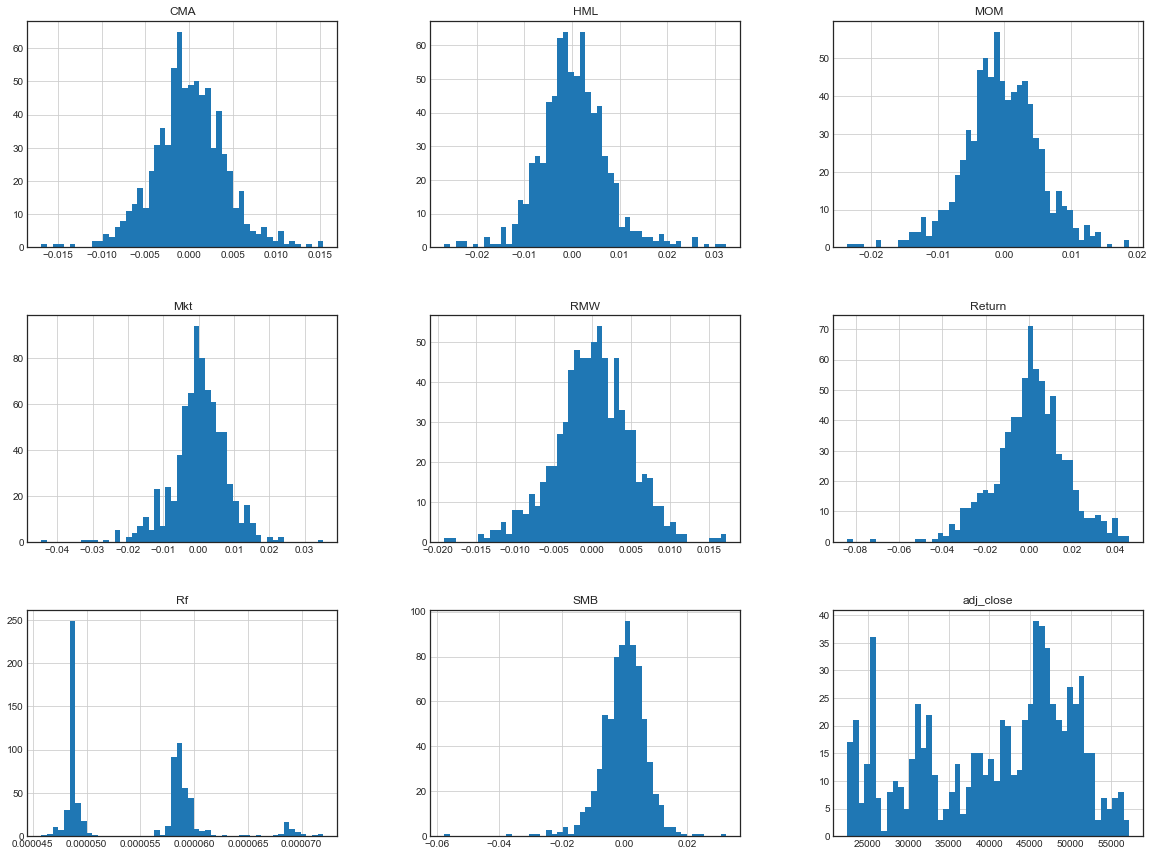

In [27]:
df.hist(bins=50, figsize = (20,15))

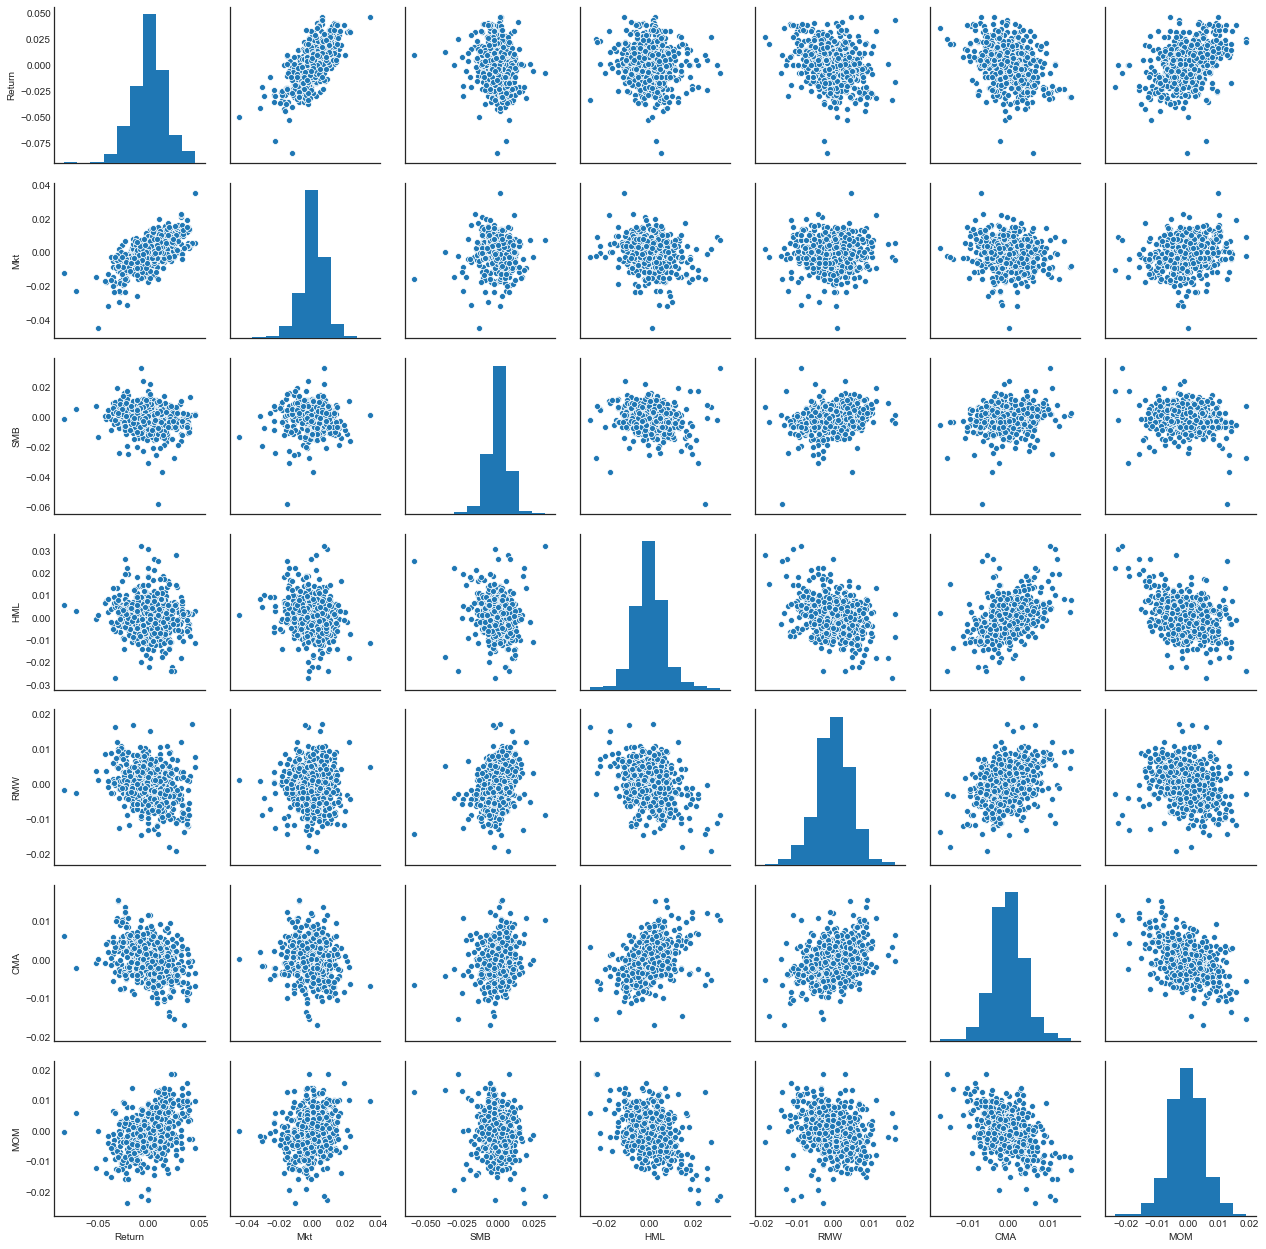

In [24]:
cols = ["Return", 'Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']
sns.pairplot(df[cols])
plt.show()

In [75]:
df.corr()

,adj_close,Mkt,SMB,HML,RMW,CMA,MOM,Rf,Return
adj_close,1.000000,0.019390,-0.032634,-0.053804,-0.014797,-0.065151,0.033724,0.034777,-0.002141
Mkt,0.019390,1.000000,-0.047908,-0.176481,0.042316,-0.114668,0.189095,-0.041607,0.657626
SMB,-0.032634,-0.047908,1.000000,-0.176091,0.267603,0.145328,-0.102469,0.053700,-0.168510
HML,-0.053804,-0.176481,-0.176091,1.000000,-0.285613,0.450912,-0.439546,-0.006496,-0.085935
RMW,-0.014797,0.042316,0.267603,-0.285613,1.000000,0.375480,-0.231603,0.025791,-0.267808
CMA,-0.065151,-0.114668,0.145328,0.450912,0.375480,1.000000,-0.461095,0.016599,-0.316029
MOM,0.033724,0.189095,-0.102469,-0.439546,-0.231603,-0.461095,1.000000,0.007315,0.387182
Rf,0.034777,-0.041607,0.053700,-0.006496,0.025791,0.016599,0.007315,1.000000,-0.050526
Return,-0.002141,0.657626,-0.168510,-0.085935,-0.267808,-0.316029,0.387182,-0.050526,1.000000


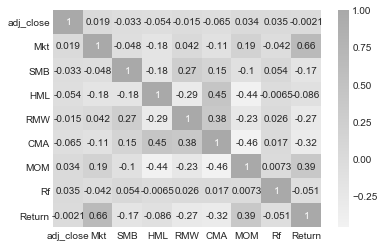

In [82]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

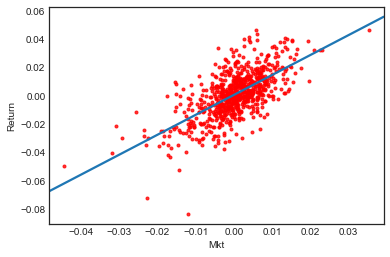

In [10]:
sns.regplot(df.Mkt, df.Return, order=1, ci=None, scatter_kws={'color':'r', 's':9})

In [30]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()
X = df.Mkt.values.reshape(-1,1)
# X = scale(df.Mkt.values.reshape(-1,1), with_mean=True, with_std=False).reshape(-1,1)
y = df.Return

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

0.0006365511903722964
[1.4062272]


In [55]:
Returns_pred = regr.predict(X)
r2_score(y, Returns_pred)

0.4324716204782567

In [52]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-0.0001, regr.intercept_+0.0001, 50)
B1 = np.linspace(regr.coef_-0.01, regr.coef_+0.01, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)
min_rss

0.11503742819378263

/anaconda3/envs/QuantAlgo/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


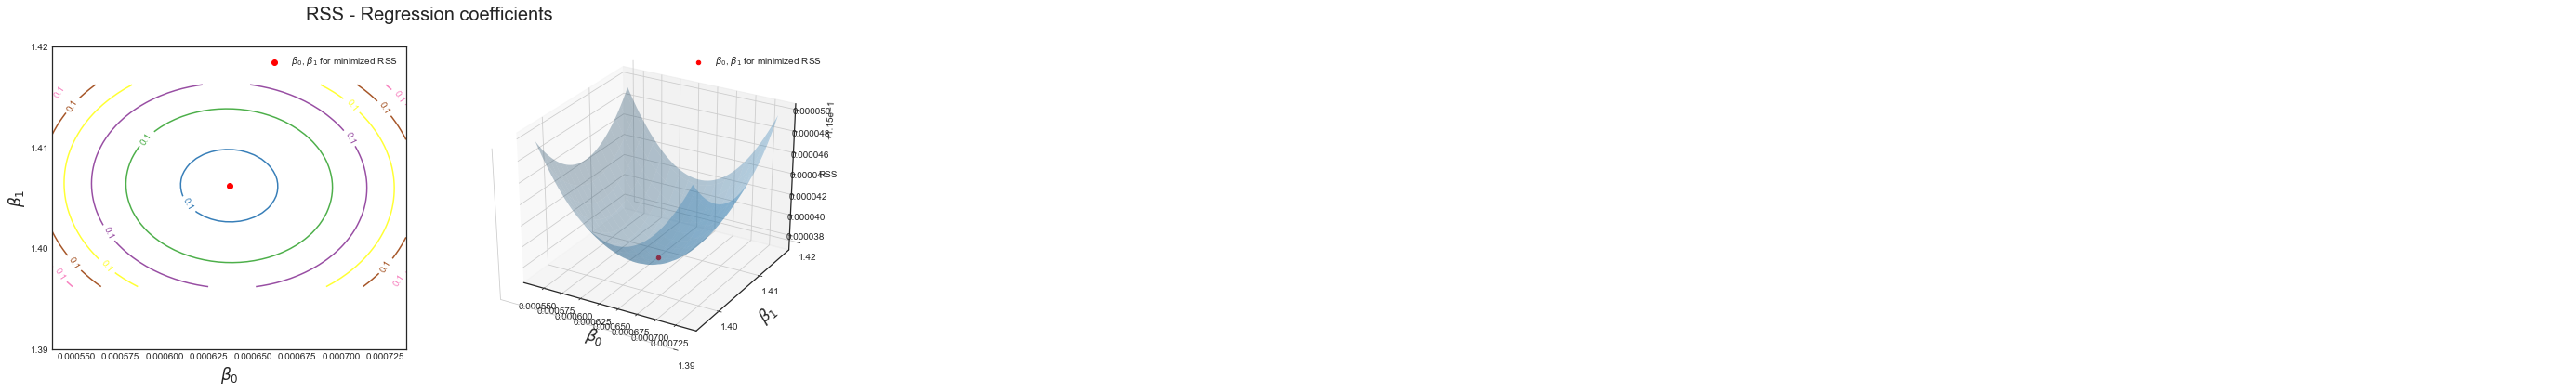

In [53]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1)
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
# ax2.set_zlim(Z.min(),Z.max())
# ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([1.39,1.40,1.41,1.42])
    ax.legend()


In [81]:
# statmodels를 이용한 선형회귀
sm_model_1 = smf.ols('Return ~ Mkt + SMB + RMW + CMA + MOM', df).fit()
sm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     196.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.84e-133
Time:                        15:03:35   Log-Likelihood:                 2345.5
No. Observations:                 754   AIC:                            -4679.
Df Residuals:                     748   BIC:                            -4651.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      2.128      0.034    6.51e-05       0.002
Mkt            1.3282      0.053     25.174      0.000       1.225       1.432
SMB           -0.1219      0.057     -2.124      0.034      -0.235      -0.009
RMW           -0.7052      0.090     -7.798      0.000      -0.883      -0.528
CMA           -0.2964      0.113     -2.614      0.009      -0.519      -0.074
MOM            0.5207      0.079      6.581      0.000       0.365       0.676
==============================================================================
Omnibus:                       72.606   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              451.672
Skew:                          -0.062   Prob(JB):                     8.33e-99
Kurtosis:                       6.790   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
X = df[['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']]
y = df['Return']
sm_model_2 = smf.ols('y~X', df).fit()
sm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     170.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          3.52e-136
Time:                        16:08:30   Log-Likelihood:                 2354.6
No. Observations:                 754   AIC:                            -4695.
Df Residuals:                     747   BIC:                            -4663.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      2.053      0.040     3.5e-05       0.002
X[0]           1.3415      0.052     25.672      0.000       1.239       1.444
X[1]          -0.0701      0.058     -1.208      0.228      -0.184       0.044
X[2]           0.3514      0.082      4.265      0.000       0.190       0.513
X[3]          -0.4444      0.108     -4.103      0.000      -0.657      -0.232
X[4]          -0.6016      0.133     -4.523      0.000      -0.863      -0.341
X[5]           0.6654      0.085      7.804      0.000       0.498       0.833
==============================================================================
Omnibus:                       74.184   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.850
Skew:                          -0.154   Prob(JB):                     1.86e-96
Kurtosis:                       6.733   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

t값과 F값이 모두 유의함!

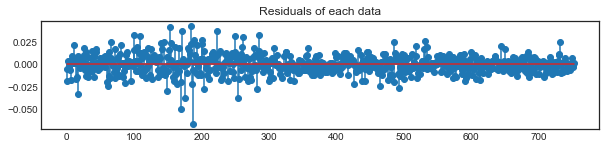

In [107]:
# DW검정은 오차의 자기상관 검정 (2일때 비상관, <2일 때 + 자기상관, >2일때 - 자기상관)
# JB검정은 오차의 정규성 검정 (정규분포는 0)
plt.figure(figsize=(10, 2))
plt.stem(sm_model_2.resid)
plt.title("Residuals of each data")
plt.show()

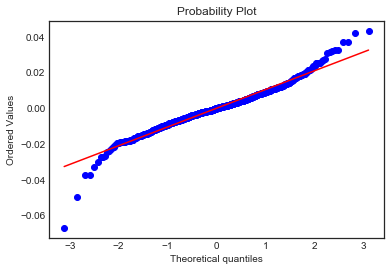

In [160]:
# QQ plot
import scipy as sp
sp.stats.probplot(sm_model_2.resid, dist="norm", plot=plt)
plt.show()

오차가 정규분포가 아니다! -> 선형회귀는 최선의 분석방법이 아님.

In [89]:
# 다중공선성 체크
# VIF = (1 - R^2)^2으로, 독립변수간 상관관계가 클 수록 커진다. 보통 VIF가 5이상이라면 심각한 다중공선성을 의미.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,16.628718,adj_close
1,1.991767,Mkt
2,1.139527,SMB
3,2.303046,HML
4,1.879415,RMW
5,2.045845,CMA
6,1.692450,MOM
7,16.635438,Rf
8,2.374419,Return


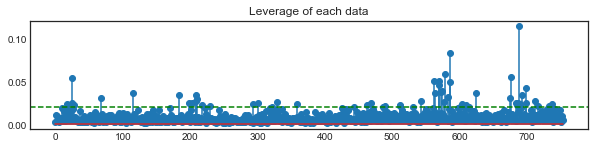

In [110]:
# 레버리지 체크 : y^hat에 값이 특정 y에 의해 영향받는 정도를 의미함. 레버리지 값이 큰 데이터일 수록 그 값의 유무가 결과값을 크게 변화시킨다.
influence = sm_model_2.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("Leverage of each data")
plt.show()

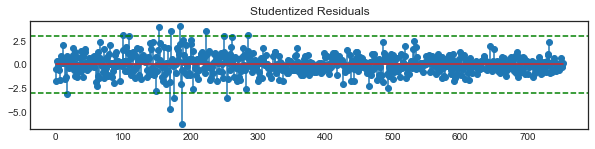

In [113]:
# 아웃라이어 체크 : 잔차를 표준화시킨 스튜던트와 잔차의 절대값이 3보다 큰 관측치는 아웃라이어일 가능성 큼.
plt.figure(figsize=(10, 2))
plt.stem(sm_model_2.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Studentized Residuals")
plt.show()

In [152]:
# cook의 거리: 레버리지와 아웃라이어를 모두 고려하여 cook거리가 일정 값보다 크게 되면 아웃라이어로 판단하게 된다.
# cook 거리는 influence안에 메소드로 주어져 있으며 아웃라이어 임계값은 4/(N-k-1)로 제안된다.

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 6)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(X))).difference(idx))
df_new = df.iloc[idx2, :]
X_new = X.iloc[idx2, :]
y_new = y.iloc[idx2]
sm_model_3 = smf.ols('y_new~X_new', df_new).fit()
sm_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_new   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          1.58e-162
Time:                        16:11:16   Log-Likelihood:                 2364.8
No. Observations:                 709   AIC:                            -4716.
Df Residuals:                     702   BIC:                            -4684.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0009      0.000      2.654      0.008       0.000       0.002
X_new[0]       1.2812      0.045     28.202      0.000       1.192       1.370
X_new[1]      -0.0609      0.051     -1.184      0.237      -0.162       0.040
X_new[2]       0.2767      0.073      3.803      0.000       0.134       0.419
X_new[3]      -0.5396      0.097     -5.536      0.000      -0.731      -0.348
X_new[4]      -0.5818      0.118     -4.924      0.000      -0.814      -0.350
X_new[5]       0.6788      0.073      9.255      0.000       0.535       0.823
==============================================================================
Omnibus:                       19.209   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.531
Skew:                           0.163   Prob(JB):                     3.17e-08
Kurtosis:                       4.031   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

훨씬 좋아졌다!

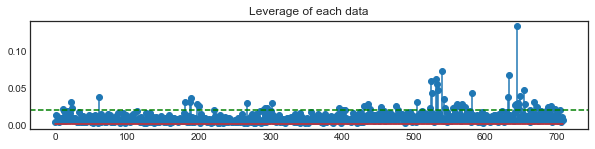

In [153]:
influence = sm_model_3.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("Leverage of each data")
plt.show()

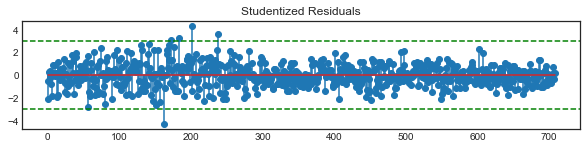

In [154]:
plt.figure(figsize=(10, 2))
plt.stem(sm_model_3.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("Studentized Residuals")
plt.show()

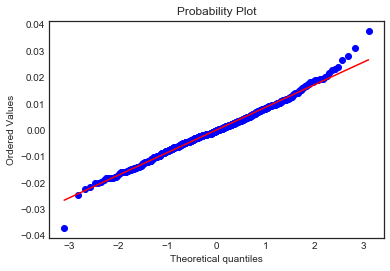

In [159]:
# QQ plot
import scipy as sp
sp.stats.probplot(sm_model_3.resid, dist="norm", plot=plt)
plt.show()

In [237]:
train_set, test_set = train_test_split(df_new, test_size=0.2, shuffle=False)


train_X = train_set[['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']].as_matrix()
train_y = train_set['Return']

test_X = test_set[['Mkt', 'SMB', 'HML', 'RMW', 'CMA', 'MOM']].as_matrix()
test_y = test_set['Return']
                                     
train_model = smf.ols('Return ~ Mkt + SMB + HML + RMW + CMA + MOM', train_set).fit()
train_model.summary()

/anaconda3/envs/QuantAlgo/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/anaconda3/envs/QuantAlgo/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          3.31e-109
Time:                        17:56:10   Log-Likelihood:                 1857.8
No. Observations:                 567   AIC:                            -3702.
Df Residuals:                     560   BIC:                            -3671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.000      2.659      0.008       0.000       0.002
Mkt            1.3417      0.058     23.047      0.000       1.227       1.456
SMB           -0.0649      0.069     -0.945      0.345      -0.200       0.070
HML            0.2571      0.088      2.922      0.004       0.084       0.430
RMW           -0.6562      0.115     -5.729      0.000      -0.881      -0.431
CMA           -0.4944      0.147     -3.363      0.001      -0.783      -0.206
MOM            0.6432      0.087      7.383      0.000       0.472       0.814
==============================================================================
Omnibus:                       10.300   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               16.032
Skew:                           0.105   Prob(JB):                     0.000330
Kurtosis:                       3.797   Cond. No.                         453.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
test_model = train_model.predict(test_set)
test_resid = test_y-test_model

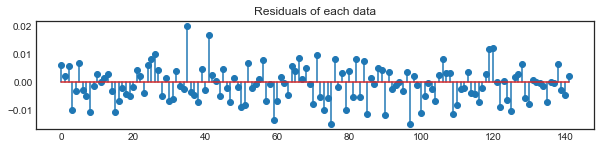

In [240]:
plt.figure(figsize=(10, 2))
plt.stem(test_resid)
plt.title("Residuals of each data")
plt.show()

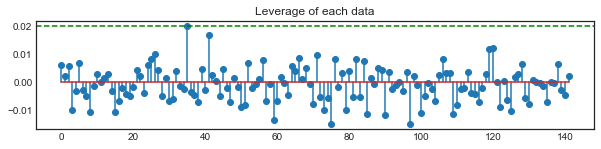

In [241]:
plt.figure(figsize=(10, 2))
plt.stem(test_resid)
plt.axhline(0.02, c="g", ls="--")
plt.title("Leverage of each data")
plt.show()

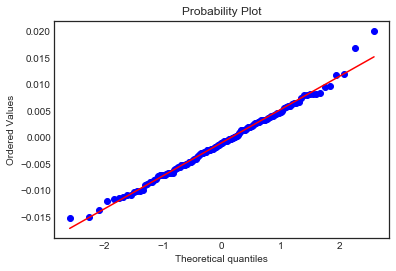

In [242]:
sp.stats.probplot(test_resid, dist="norm", plot=plt)
plt.show()

In [243]:
def RMSE(data):
    # return root mean square of error
    return np.sqrt((data**2).mean())
print(RMSE(train_model.resid))
print(RMSE(test_resid))

0.009135707168617929
0.006264886510723239


전략 백테스트 (trainset)

오늘의 수익률 예측값이 양수이면 내일 종가에 매수, 음수이면 내일 종가에 매도하는 전략

In [246]:
fit = train_model.predict(train_set)

train set에서 확인

In [248]:
df_data = pd.DataFrame(train_set['Return'])
df_data.rename(columns={"Return":"Buy & Hold"}, inplace = True)
df_data['Linear_fit'] = fit
df_signal = df_data.copy()
df_signal['Position'] = np.where(df_signal['Linear_fit']>0,1,-1)
df_signal['Strategy_Returns'] = df_signal['Buy & Hold']*df_signal['Position'].shift(1)
df_signal.dropna(inplace=True)
df_signal.head()

,Buy & Hold,Linear_fit,Position,Strategy_Returns
Date,,,,
2016-01-06,-0.027698,-0.010594,-1,-0.027698
2016-01-07,-0.010265,-0.013149,-1,0.010265
2016-01-08,0.006855,0.009991,1,-0.006855
2016-01-11,-0.016359,-0.020087,-1,-0.016359
2016-01-12,-0.005222,0.002022,1,0.005222


In [249]:
def APR(dataframe):
    return dataframe.dropna().cumsum().apply(np.exp)[-1]**(252/len(df_signal))-1
def sharpratio(dataframe):
    return np.sqrt(252)*dataframe.mean()/dataframe.std()   

Buy & Hold: APR = 0.42711469651883327, sharpratio = 1.5405407142539627
Strategy: APR = -0.10074175537879237, sharpratio = -0.45798350545697336


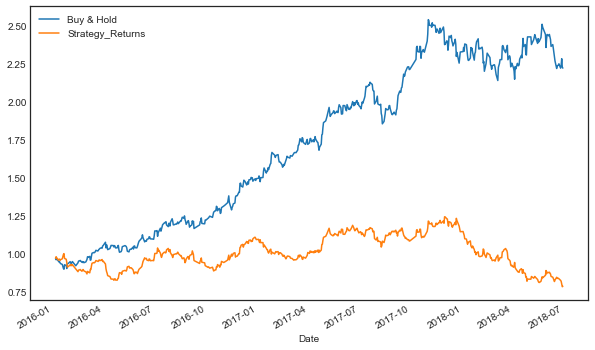

In [250]:
df_signal[['Buy & Hold', 'Strategy_Returns']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
print("Buy & Hold: APR = {}, sharpratio = {}".format(APR(df_signal['Buy & Hold']), sharpratio(df_signal['Buy & Hold'])))
print("Strategy: APR = {}, sharpratio = {}".format(APR(df_signal['Strategy_Returns']), sharpratio(df_signal['Strategy_Returns'])))

test set에서

In [251]:
prediction = test_model

In [252]:
df_data_test = pd.DataFrame(test_set['Return'])
df_data_test.rename(columns={"Return":"Buy & Hold"}, inplace = True)
df_data_test['Linear_fit'] = prediction
df_signal_test = df_data_test.copy()
df_signal_test['Position'] = np.where(df_signal_test['Linear_fit']>0,1,-1)
df_signal_test['Strategy_Returns'] = df_signal_test['Buy & Hold']*df_signal_test['Position'].shift(1)
df_signal_test.dropna(inplace=True)
df_signal_test.head()

,Buy & Hold,Linear_fit,Position,Strategy_Returns
Date,,,,
2018-07-03,0.013086,0.011094,1,-0.013086
2018-07-04,0.002165,-0.003499,-1,0.002165
2018-07-05,-0.006508,0.003509,1,0.006508
2018-07-09,0.015470,0.018748,1,0.015470
2018-07-10,0.015234,0.008677,1,0.015234


Buy & Hold: APR = 0.020900208851911684, sharpratio = 0.32484186170092605
Strategy: APR = -0.015269904414578539, sharpratio = -0.24163135413045583


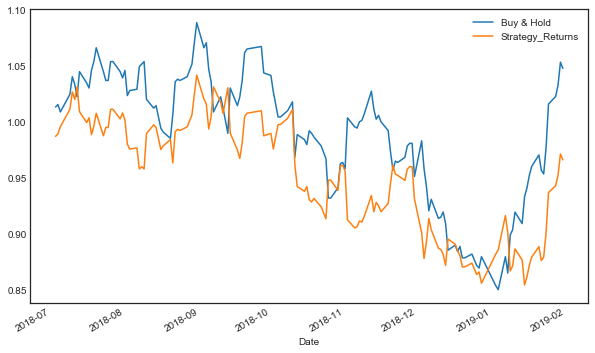

In [253]:
df_signal_test[['Buy & Hold', 'Strategy_Returns']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
print("Buy & Hold: APR = {}, sharpratio = {}".format(APR(df_signal_test['Buy & Hold']), sharpratio(df_signal_test['Buy & Hold'])))
print("Strategy: APR = {}, sharpratio = {}".format(APR(df_signal_test['Strategy_Returns']), sharpratio(df_signal_test['Strategy_Returns'])))